In [7]:
##importar bibliotecas
import pandas as pd                 
import numpy as np
#Para a árvore de decisão
from sklearn import tree            
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
#plotagem
import pydotplus         
from IPython.display import Image  
#carregar dataset
import glob                        
from google.colab import files     
#temporizador
import time
from functools import wraps

In [2]:
#para carregar novo arquivo 
uploaded = files.upload() 
for fn in uploaded.keys():            
  start_time = time.time()
  all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
#combinar todos os arquivos na lista
start_time = time.time()
BD_csv = pd.concat([pd.read_csv(f, sep=';') for f in all_filenames ])
time_Dataset = time.time() - start_time

Saving TcaixasALP.csv to TcaixasALP.csv


In [8]:
#carregar base de dados ja existente 
start_time = time.time()
BD_csv = pd.read_csv("TcaixasALP.csv", delimiter =';')
time_Dataset = time.time() - start_time

In [9]:
#calculando volume 
start_time = time.time()
a = BD_csv.iloc[:,0].values
l = BD_csv.iloc[:,1].values
p = BD_csv.iloc[:,2].values
v = a*l*p
BD_csv.insert(loc=4, column='volume', value = v)
time_volume = time.time() - start_time

In [10]:
#atribuido colunas do DataFrame para os algoritmo
start_time = time.time()
X= BD_csv[['volume']]
y = BD_csv[['Saida']]
time_data = time.time() - start_time

In [11]:
# O classificador da árvore de decisão.
start_time = time.time()
DTC = tree.DecisionTreeClassifier(random_state=1986,criterion='gini', max_depth=3)
time_DTC = time.time() - start_time

In [12]:
# Treinando a árvore de decisão
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
DTC_train = DTC.fit(X_train,  y_train)
time_Train_Test_sets = time.time() - start_time

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="volume <= 29967.0\ngini = 0.66\nsamples = 70\nvalue = [25, 24, 21]\nclass = grande", fillcolor="#fefcfb"] ;
1 [label="volume <= 1348.0\ngini = 0.5\nsamples = 45\nvalue = [0, 24, 21]\nclass = media", fillcolor="#e6fcef"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="volume <= 330.0\ngini = 0.09\nsamples = 22\nvalue = [0, 1, 21]\nclass = pequena", fillcolor="#8742e6"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]\nclass = pequena", fillcolor="#8139e5"] ;
2 -> 3 ;
4 [label="gini = 0.38\nsamples = 4\nvalue = [0, 1, 3]\nclass = pequena", fillcolor="#ab7bee"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]\nclass = media", fillcolor="#39e581"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 25\nvalue = [25, 0, 0]\nclass = grande", fillcolor="#e58139"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headla

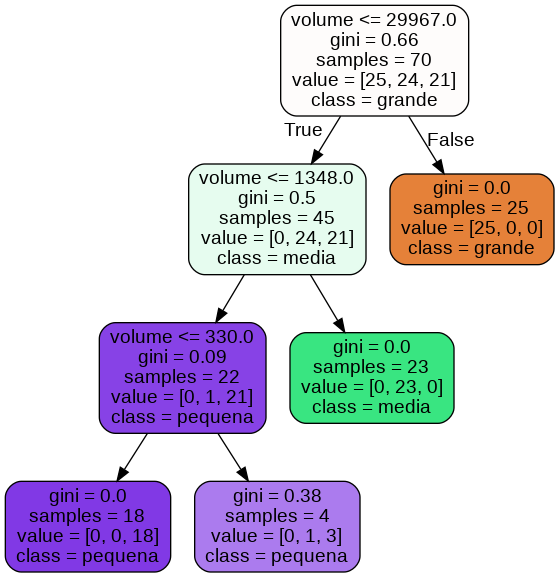

In [13]:
start_time = time.time()
#Imprimir uma árvore de decisão no formato DOT.
print(tree.export_graphviz(DTC_train, out_file=None, feature_names=list(BD_csv[['volume']]),class_names=['grande', 'media', 'pequena'], rounded=True, filled=True,precision=2))
#Criar dados de ponto
dot_data = tree.export_graphviz(DTC_train, out_file=None, feature_names=list(BD_csv[['volume']]),class_names=['grande', 'media', 'pequena'], rounded=True, filled=True,precision=2)
#Criar gráfico a partir de dados do DOT
graph = pydotplus.graph_from_dot_data(dot_data)
time_graph = time.time() - start_time
# Mostrar gráfico
Image(graph.create_png())

In [14]:
#predição do teste
start_time = time.time()
prediction = DTC.predict(X_test)
#print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
time_prediction = time.time() - start_time

              precision    recall  f1-score   support

      grande       1.00      1.00      1.00        11
       media       1.00      1.00      1.00         7
     pequena       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
#tempo de cada execução do algoritmo
print("Load Dataset:                                %.4f" % time_Dataset, "segundos.")
print("calculating volume:                          %.4f" % time_volume, "segundos.")
print("assigned DataFrame columns to the algorithm: %.4f" % time_data, "segundos.")
print("DecisionTreeClassifier:                      %.4f" % time_DTC, "segundos.")
print("Split Train Test sets:                       %.4f" % time_Train_Test_sets, "segundos.")
print("Print a decision tree:                       %.4f" % time_graph, "segundos.")
print("prediction Test:                             %.4f" % time_prediction, "segundos.")


Load Dataset:                                0.0064 segundos.
calculating volume:                          0.0039 segundos.
assigned DataFrame columns to the algorithm: 0.0035 segundos.
DecisionTreeClassifier:                      0.0001 segundos.
Split Train Test sets:                       0.0054 segundos.
Print a decision tree:                       0.0661 segundos.
prediction Test:                             0.0135 segundos.
